In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import *
from sklearn.decomposition import PCA
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/imputedanddummied.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Index                   float64
 2   pH                      float64
 3   Iron                    float64
 4   Nitrate                 float64
 5   Chloride                float64
 6   Lead                    float64
 7   Zinc                    float64
 8   Turbidity               float64
 9   Fluoride                float64
 10  Copper                  float64
 11  Odor                    float64
 12  Sulfate                 float64
 13  Conductivity            float64
 14  Chlorine                float64
 15  Manganese               float64
 16  Total Dissolved Solids  float64
 17  Water Temperature       float64
 18  Air Temperature         float64
 19  Target                  float64
 20  Color_Colorless         float64
 21  Color_Faint Yellow      float64

In [6]:
data.shape

(5956842, 25)

In [7]:
data.head()

,Unnamed: 0,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,...,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Target,Color_Colorless,Color_Faint Yellow,Color_Light Yellow,Color_Near Colorless,Color_Yellow
0,0,0.0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,...,2.269945e-15,332.118789,19.129818,43.493324,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1.0,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,...,8.024076e-07,284.641984,15.348981,71.220586,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2.0,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,...,7.007989e-02,570.054094,11.643467,44.891330,0.0,0.0,0.0,1.0,0.0,0.0
3,3,3.0,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,0.166319,0.208454,...,2.468295e-02,100.043838,10.092392,60.843233,0.0,0.0,0.0,0.0,1.0,0.0
4,4,4.0,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,...,3.296139e-03,168.075545,15.249416,69.336671,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
data.isnull().sum()

Unnamed: 0                0
Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Water Temperature         0
Air Temperature           0
Target                    0
Color_Colorless           0
Color_Faint Yellow        0
Color_Light Yellow        0
Color_Near Colorless      0
Color_Yellow              0
dtype: int64

In [9]:
# original.info()

In [10]:
#categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)



There are 0 categorical variables

The categorical variables are : []


In [11]:
y = np.ravel(data['Target'])
y

array([0., 0., 0., ..., 1., 1., 1.])

In [58]:
x = data.copy()
x.drop('Target', axis = 1,inplace = True)


In [ ]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.drop('Index', axis = 1, inplace = True)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pH                      float64
 1   Iron                    float64
 2   Nitrate                 float64
 3   Chloride                float64
 4   Lead                    float64
 5   Zinc                    float64
 6   Turbidity               float64
 7   Fluoride                float64
 8   Copper                  float64
 9   Odor                    float64
 10  Sulfate                 float64
 11  Conductivity            float64
 12  Chlorine                float64
 13  Manganese               float64
 14  Total Dissolved Solids  float64
 15  Water Temperature       float64
 16  Air Temperature         float64
 17  Target                  float64
 18  Color_Colorless         float64
 19  Color_Faint Yellow      float64
 20  Color_Light Yellow      float64
 21  Color_Near Colorless    float64

In [15]:
data.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Target,Color_Colorless,Color_Faint Yellow,Color_Light Yellow,Color_Near Colorless,Color_Yellow
count,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,...,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06
mean,7.445373e+00,1.279027e-01,6.169970e+00,1.842970e+02,1.498336e-03,1.550255e+00,5.215093e-01,9.644315e-01,5.161216e-01,1.803459e+00,...,1.092802e-01,2.671454e+02,1.912982e+01,6.000324e+01,3.030552e-01,3.001441e-01,1.812658e-01,1.272718e-01,2.998626e-01,9.049224e-02
std,8.794721e-01,4.783872e-01,3.227637e+00,6.741255e+01,3.243291e-02,1.525968e+00,9.220012e-01,8.115861e-01,5.864837e-01,1.053403e+00,...,4.717824e-01,1.558367e+02,1.120458e+01,1.805455e+01,4.595789e-01,4.583205e-01,3.852383e-01,3.332772e-01,4.581976e-01,2.868857e-01
min,1.057113e+00,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,...,4.793505e-55,1.048902e-02,6.661938e-01,-3.387091e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.906025e+00,1.052744e-05,4.002814e+00,1.393510e+02,3.766829e-122,4.291246e-01,3.950675e-02,3.867456e-01,1.349125e-01,9.194811e-01,...,2.922621e-06,1.329527e+02,1.149159e+01,4.786198e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.445373e+00,2.369800e-03,5.666858e+00,1.783345e+02,5.534643e-62,1.127029e+00,2.142737e-01,8.054145e-01,3.670169e-01,1.803459e+00,...,7.518937e-04,2.659627e+02,1.677777e+01,6.000324e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.002201e+00,5.756379e-02,7.625683e+00,2.165092e+02,8.838134e-27,2.187155e+00,6.197276e-01,1.318141e+00,6.851771e-01,2.627163e+00,...,1.941907e-02,3.984555e+02,2.354112e+01,7.214153e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.291072e+01,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,4.141998e+00,...,2.374086e+01,5.797999e+02,2.973086e+02,1.521237e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [16]:
data.shape

(5956842, 23)

In [17]:
x.drop('Unnamed: 0',axis = 1, inplace = True)

In [18]:
x.drop('Index', axis = 1, inplace = True)

In [19]:
x.shape

(5956842, 22)

In [20]:
data['Target'].value_counts()

0.0    4151590
1.0    1805252
Name: Target, dtype: int64

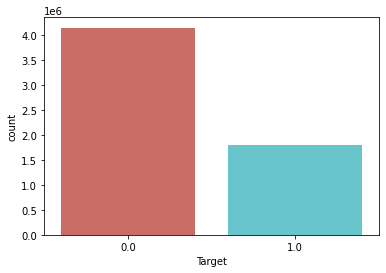

<Figure size 432x288 with 0 Axes>

In [53]:
import seaborn as sns
sns.countplot(x=data['Target'],data=data, palette='hls')
plt.show()

plt.savefig('count_plot')

In [54]:
corr = data.corr()

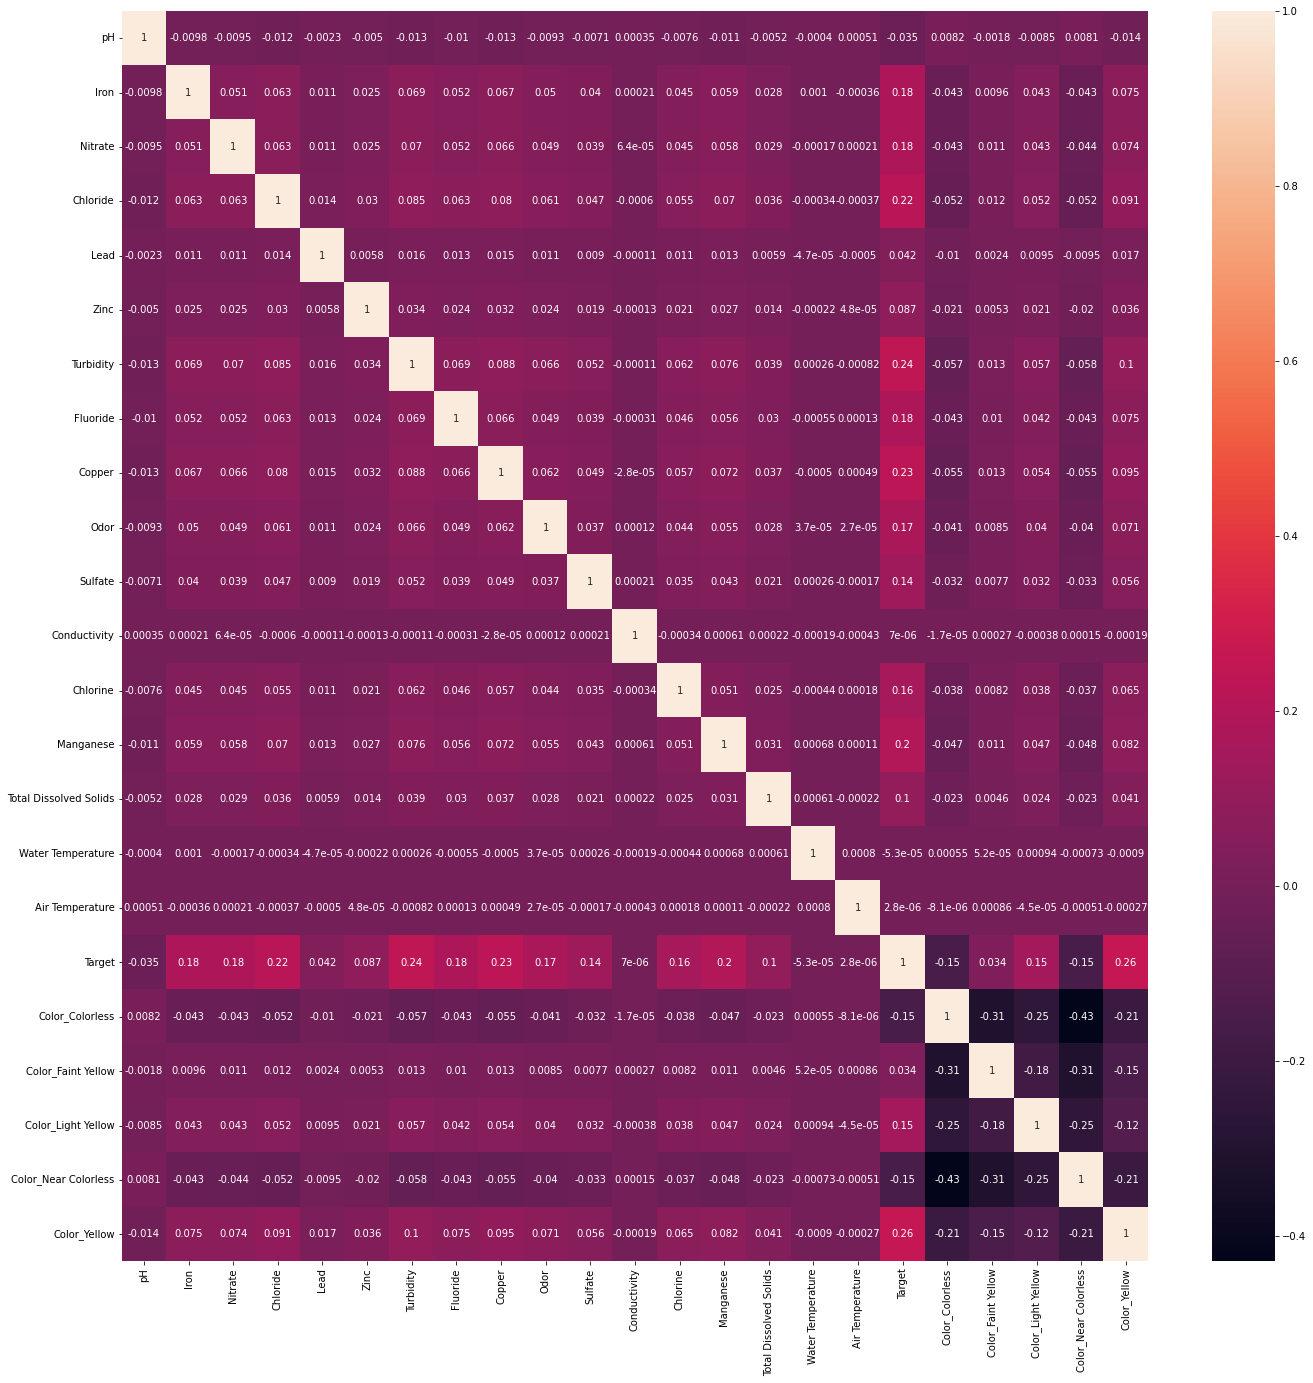

In [55]:
data_corr = data.corr()
plt.figure(figsize=(23,23))
sns.heatmap(data_corr, annot = True)



In [ ]:
x.groupby(y).mean()


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(x)



array([[6.13811156e-01, 4.31312437e-06, 8.65682172e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.94427600e-01, 4.16150817e-06, 3.58775094e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.70068737e-01, 1.03889364e-03, 3.67393536e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.98000214e-01, 2.56852418e-07, 7.10341036e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.08796634e-01, 6.38825283e-05, 1.02973582e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.46872396e-01, 1.17604823e-03, 4.80353528e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [26]:
x.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Color_Colorless,Color_Faint Yellow,Color_Light Yellow,Color_Near Colorless,Color_Yellow
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,...,3.708178,2.269945e-15,332.118789,19.129818,43.493324,1.0,0.0,0.0,0.0,0.0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,...,3.292038,8.024076e-07,284.641984,15.348981,71.220586,0.0,1.0,0.0,0.0,0.0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,3.414619,...,3.560224,7.007989e-02,570.054094,11.643467,44.891330,0.0,0.0,1.0,0.0,0.0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,0.166319,0.208454,0.239451,1.803459,...,3.516907,2.468295e-02,100.043838,10.092392,60.843233,0.0,0.0,0.0,1.0,0.0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,...,3.177849,3.296139e-03,168.075545,15.249416,69.336671,0.0,0.0,1.0,0.0,0.0


In [27]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 14)
x = pca.fit_transform(x)

In [28]:
x.shape


(5956842, 14)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [30]:
# pd.DataFrame(y_train).value_counts()

In [31]:
# pd.DataFrame(y_test).value_counts()


In [32]:
# x_test.shape

In [33]:
# y_test.shape

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
x_train.shape

(4169789, 14)

In [36]:
oversample = SMOTE(random_state = 42)


In [37]:
train_x,train_y= oversample.fit_resample(x_train, y_train)

In [38]:
train_x.shape

(5810892, 14)

In [39]:
pd.DataFrame(train_y).value_counts()

0.0    2905446
1.0    2905446
dtype: int64

In [40]:
test_x,test_y= oversample.fit_resample(x_test, y_test)

In [41]:
pd.DataFrame(test_y).value_counts()

0.0    1246144
1.0    1246144
dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = "saga") 
LR.fit(train_x, train_y)

LogisticRegression(solver='saga')

In [43]:
accuracy_score(test_y, LR.predict(test_x))

0.7673551371270094

In [44]:
print(classification_report(test_y, LR.predict(test_x)))

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78   1246144
         1.0       0.79      0.73      0.76   1246144

    accuracy                           0.77   2492288
   macro avg       0.77      0.77      0.77   2492288
weighted avg       0.77      0.77      0.77   2492288



In [45]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.009,num_iteration = 100,num_leaves =100,max_depth=-5,callbacks=[lgb.early_stopping(stopping_rounds=5)],random_state=42)
model.fit(train_x,train_y,
          verbose=20,eval_metric='logloss')


/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(callbacks=[<function early_stopping.<locals>._callback at 0x7f0930c61ee0>],
               learning_rate=0.009, max_depth=-5, num_iteration=100,
               num_leaves=100, random_state=42)

In [46]:
accuracy_score(test_y,model.predict(test_x))

0.8619192484977659

In [47]:
y_predict = model.predict(test_x)

In [48]:
print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86   1246144
         1.0       0.84      0.89      0.87   1246144

    accuracy                           0.86   2492288
   macro avg       0.86      0.86      0.86   2492288
weighted avg       0.86      0.86      0.86   2492288



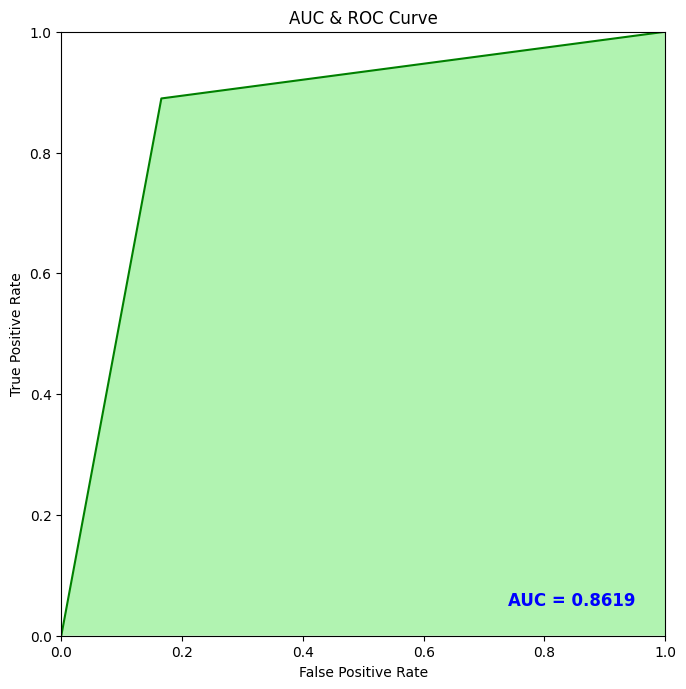

In [51]:
auc = roc_auc_score(test_y, y_predict)

false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, y_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()